In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import os
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# EDA and preprocessing

In [4]:
data = pd.read_csv('dataset1.csv')
data.info()
data.head()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       880 non-null    int64  
 1   P       880 non-null    float64
 2   K       880 non-null    int64  
 3   pH      880 non-null    float64
 4   EC      880 non-null    float64
 5   OC      880 non-null    float64
 6   S       880 non-null    float64
 7   Zn      880 non-null    float64
 8   Fe      880 non-null    float64
 9   Cu      880 non-null    float64
 10  Mn      880 non-null    float64
 11  B       880 non-null    float64
 12  Output  880 non-null    int64  
dtypes: float64(10), int64(3)
memory usage: 89.5 KB


,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
count,880.00000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000
mean,246.73750,14.562159,499.978409,7.510500,0.543659,0.617989,7.545080,0.469273,4.140523,0.952443,8.666500,0.590159,0.588636
std,77.38886,21.967755,124.222838,0.464912,0.141597,0.842986,4.424184,1.894234,3.110011,0.465900,4.298828,0.570800,0.575462
min,6.00000,2.900000,11.000000,0.900000,0.100000,0.100000,0.640000,0.070000,0.210000,0.090000,0.110000,0.060000,0.000000
25%,201.00000,6.800000,412.000000,7.350000,0.430000,0.380000,4.700000,0.280000,2.050000,0.630000,6.225000,0.270000,0.000000
50%,257.00000,8.100000,475.000000,7.500000,0.545000,0.590000,6.640000,0.360000,3.565000,0.930000,8.345000,0.405000,1.000000
75%,307.00000,10.550000,581.000000,7.630000,0.640000,0.780000,8.750000,0.470000,6.320000,1.250000,11.472500,0.610000,1.000000
max,383.00000,125.000000,887.000000,11.150000,0.950000,24.000000,31.000000,42.000000,44.000000,3.020000,31.000000,2.820000,2.000000


# Input

N - ratio of Nitrogen (NH4+) content in so
il
P - ratio of Phosphorous (P) content in so
il
K - ratio of Potassium (K) content in s
oil
ph - soil acidity 
(pH)
ec - electrical conduct
ivity
oc - organic 
carbon
S - sul
fur (S)
zn - Z
inc (Zn)
fe - 
Iron (Fe)
cu - C
opper (Cu)
Mn - Man
ganese (Mn)
B
 - Born (B)
Output

Class fertility (0 "Less Fertile", 1 "Fertile", 2 "Highly Fertile")

In [6]:
for col in data.columns:
    print(col, data[col].nunique())
    print(data[col].unique())

N 61
[138 213 163 157 270 220 207 289 151 144 201 182 238 245 282 307 364 276
 169 295  82 107  38  88  19  56  50  25 264 301 226 326 251 195  31  69
 132   6 351  13 314  75 232 188 126 119 257 333 320 345 100  63 358 113
 176 200 370 377 339  94 383]
P 92
[  8.6   7.5   9.6   6.8   9.9   7.2   7.    8.1   5.3   8.3   7.7   9.2
   6.1   9.4   5.5   5.    5.7   7.9  10.7   5.9   4.8   6.4   6.6   4.4
   4.6   9.   59.2  14.5  78.9  14.9  12.3  11.2  12.9  11.4  14.3  10.5
  10.3  12.7  11.8  14.7  13.4   3.9  11.   11.6  18.4  20.4  19.3  18.2
  19.5  20.8  21.5  21.1  10.1   8.8   2.9  15.6  12.5  13.8  76.8 103.1
  63.6  61.4  70.2  68.   65.8  74.6  81.1  98.7  85.5  72.4  13.2  12.1
 111.8 125.   15.1 118.4  14.   13.6  15.4  16.   17.3  94.3  92.1  89.9
  96.5 122.8 114.  107.5  83.3  87.7 105.3 120.6]
K 62
[560 338 718 475 444 222 401 739 549 306 676 771 655 803 454 127  11 496
 359 507 465 760 697 517 612 581 708 370 591 623 348 327 391 433 253 644
 412 486 539 275 422 380 570 

In [7]:
data[data.duplicated()] #No duplicates

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output


In [8]:
data['New_Output'] = data['Output'].apply(lambda x: 0 if x == 0 else 1)
data.head()
data.describe()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output,New_Output
count,880.00000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000
mean,246.73750,14.562159,499.978409,7.510500,0.543659,0.617989,7.545080,0.469273,4.140523,0.952443,8.666500,0.590159,0.588636,0.544318
std,77.38886,21.967755,124.222838,0.464912,0.141597,0.842986,4.424184,1.894234,3.110011,0.465900,4.298828,0.570800,0.575462,0.498315
min,6.00000,2.900000,11.000000,0.900000,0.100000,0.100000,0.640000,0.070000,0.210000,0.090000,0.110000,0.060000,0.000000,0.000000
25%,201.00000,6.800000,412.000000,7.350000,0.430000,0.380000,4.700000,0.280000,2.050000,0.630000,6.225000,0.270000,0.000000,0.000000
50%,257.00000,8.100000,475.000000,7.500000,0.545000,0.590000,6.640000,0.360000,3.565000,0.930000,8.345000,0.405000,1.000000,1.000000
75%,307.00000,10.550000,581.000000,7.630000,0.640000,0.780000,8.750000,0.470000,6.320000,1.250000,11.472500,0.610000,1.000000,1.000000
max,383.00000,125.000000,887.000000,11.150000,0.950000,24.000000,31.000000,42.000000,44.000000,3.020000,31.000000,2.820000,2.000000,1.000000


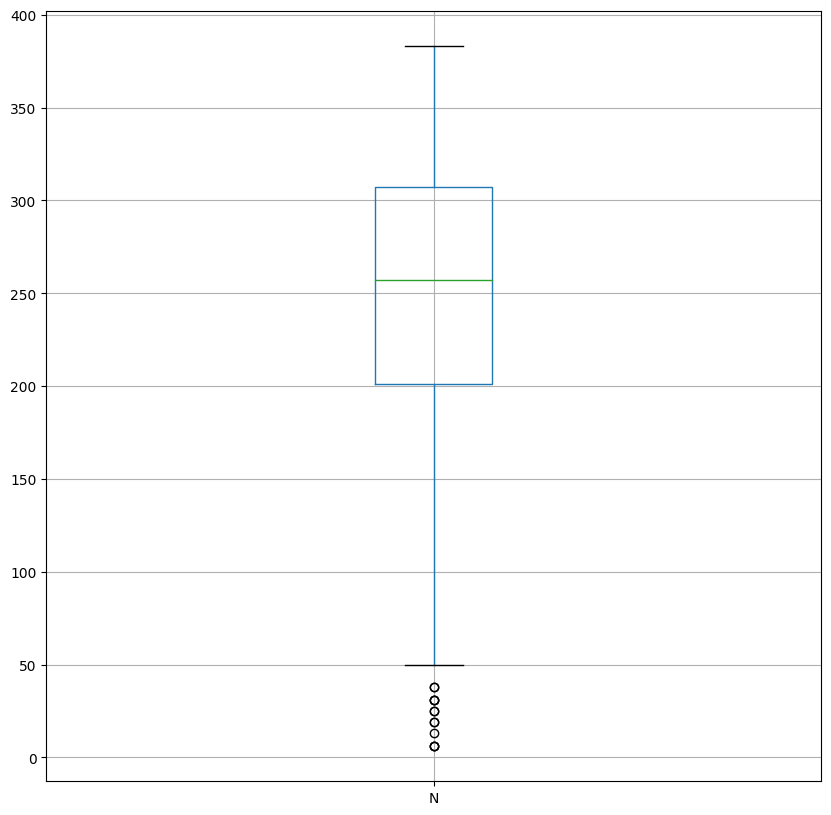

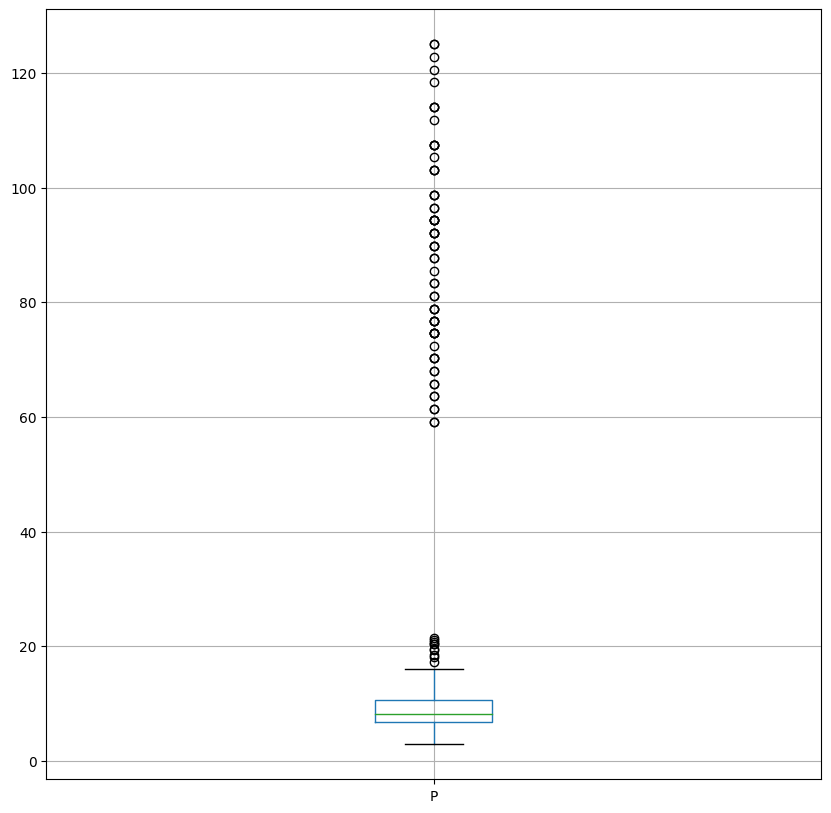

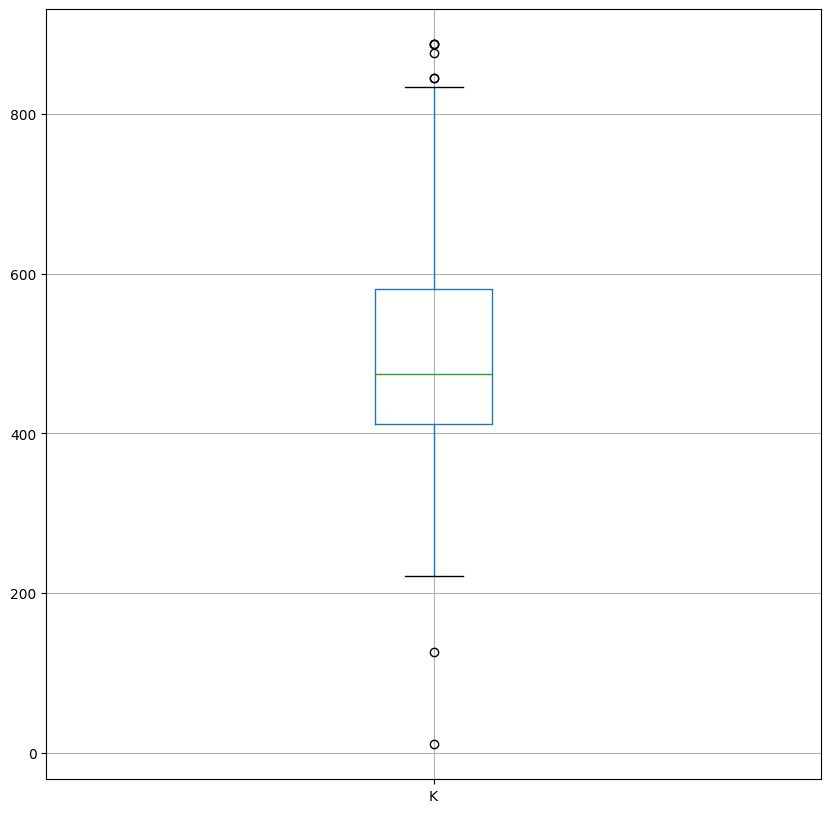

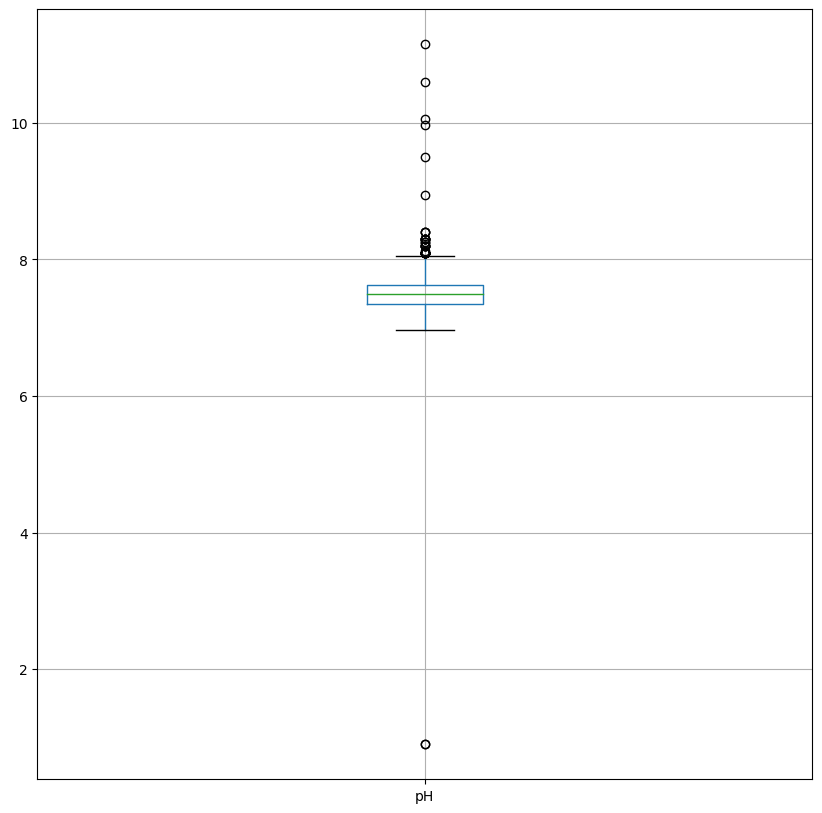

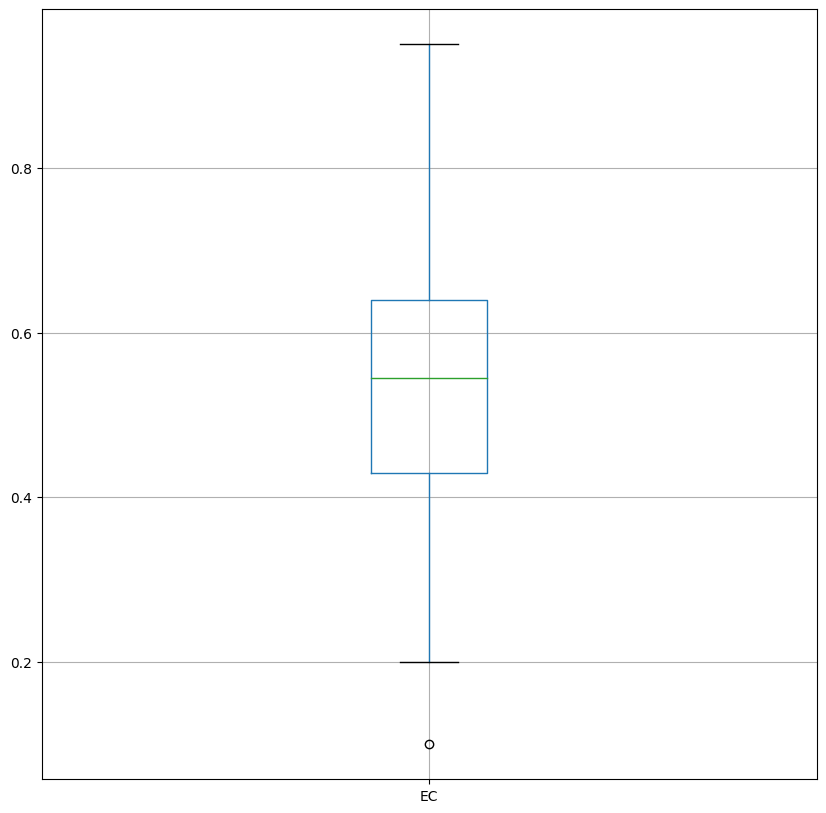

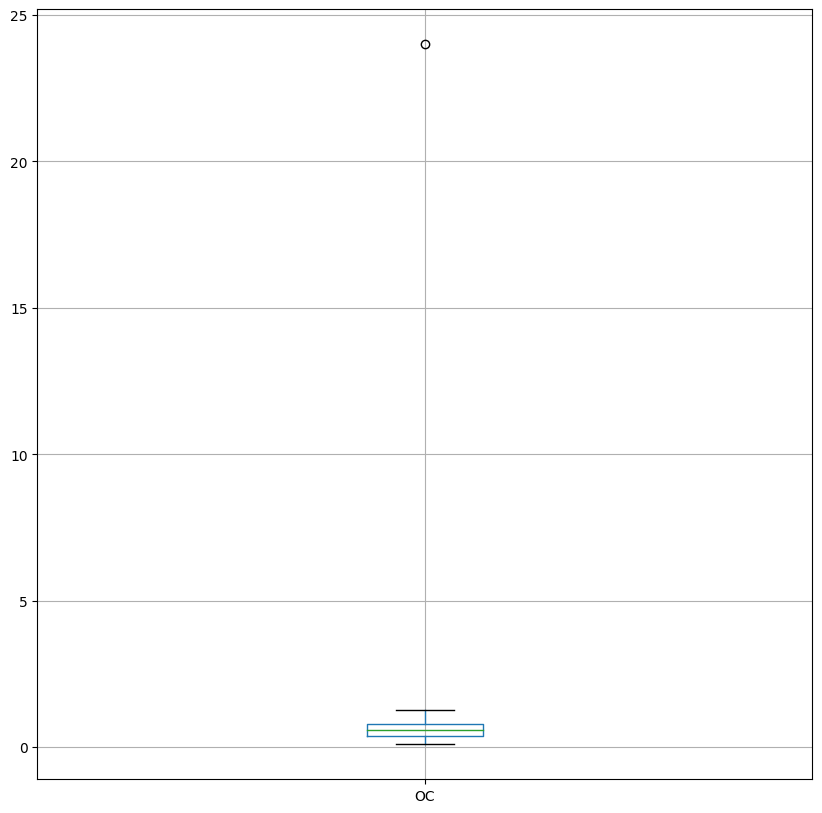

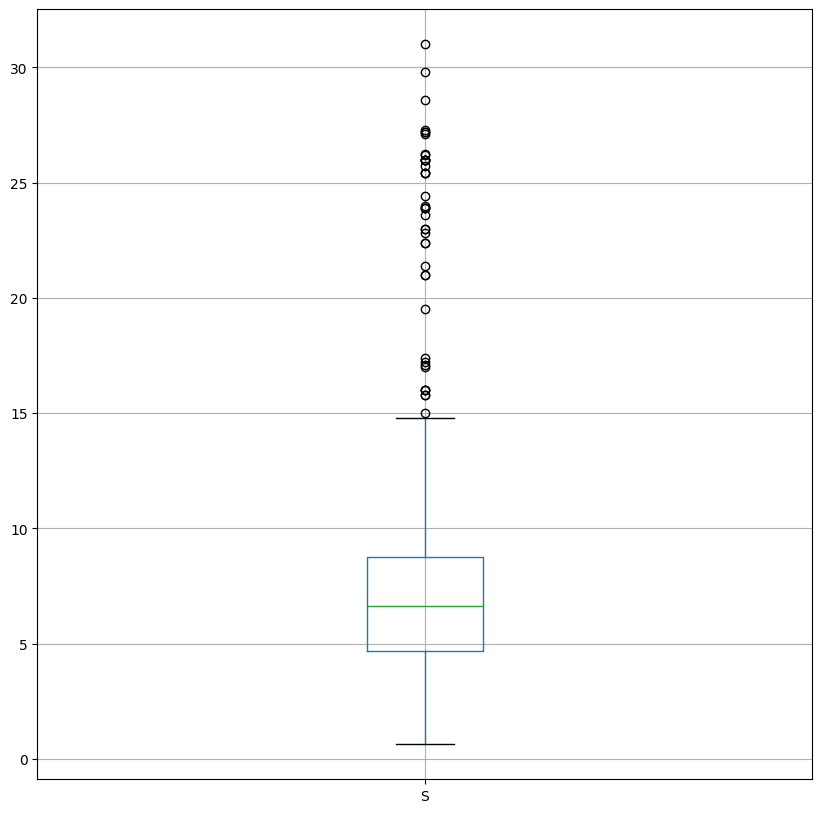

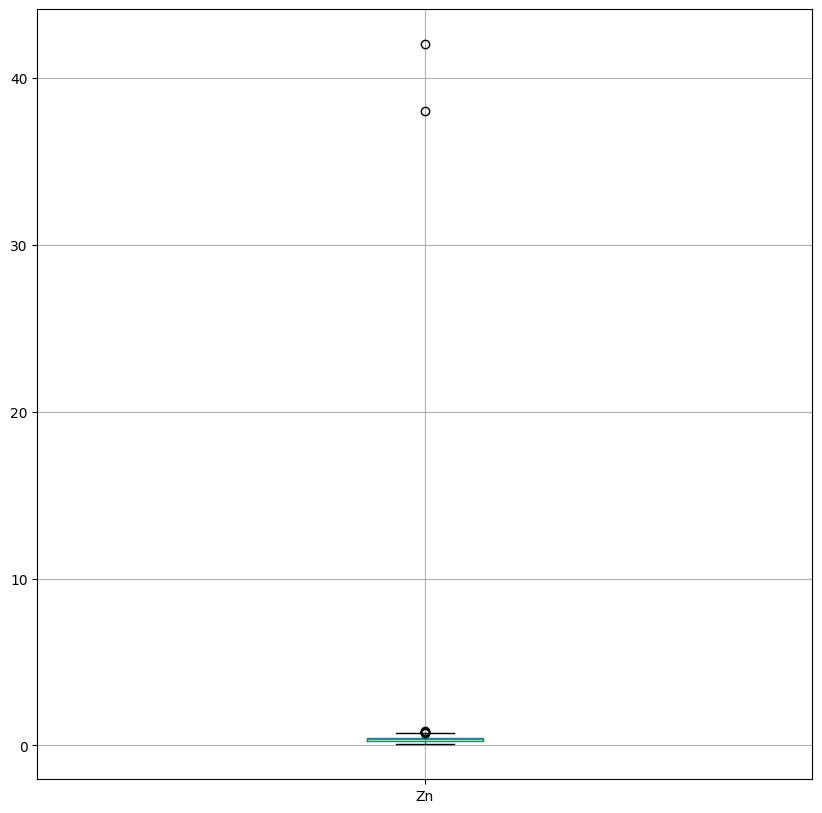

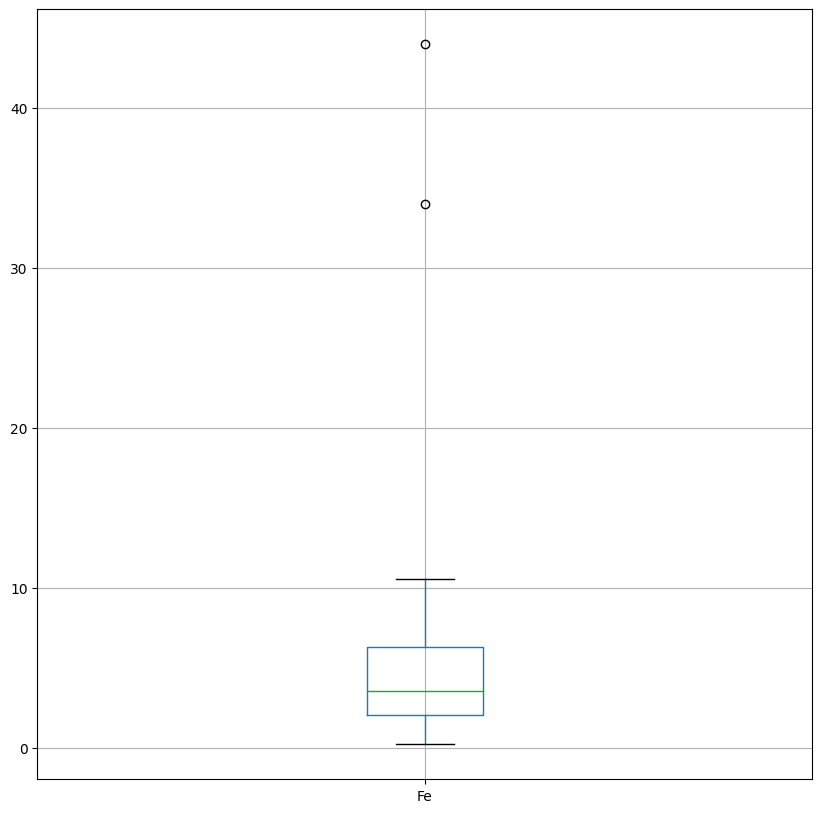

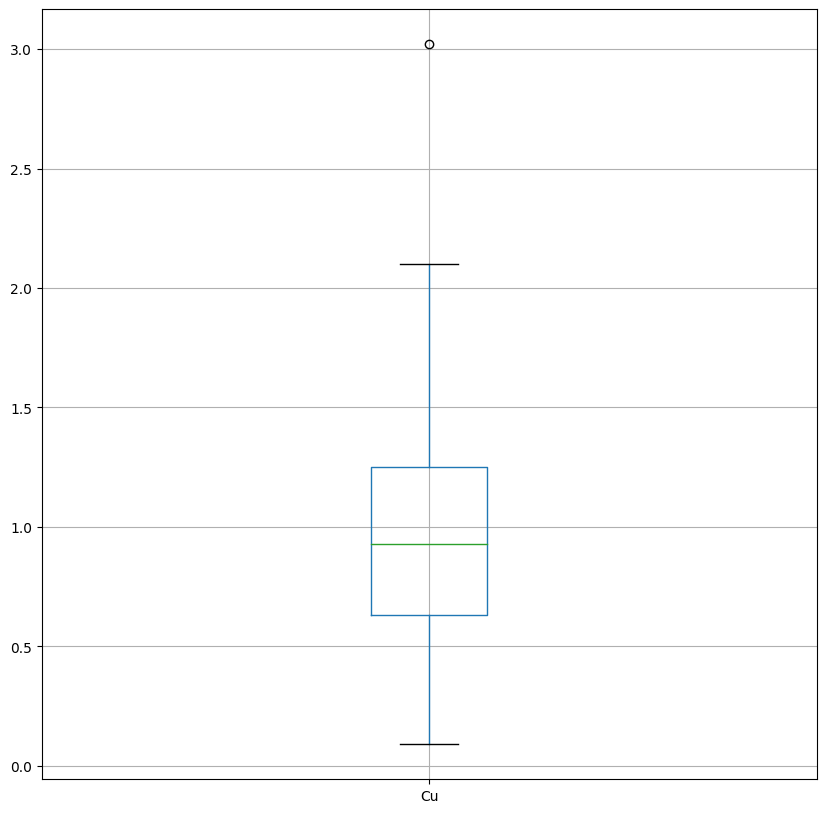

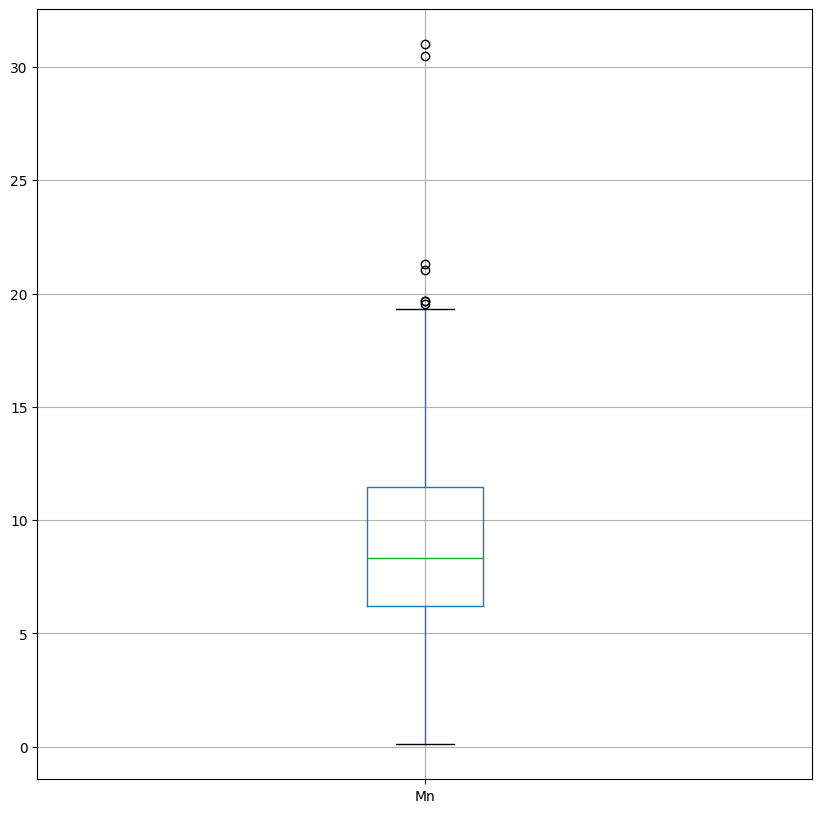

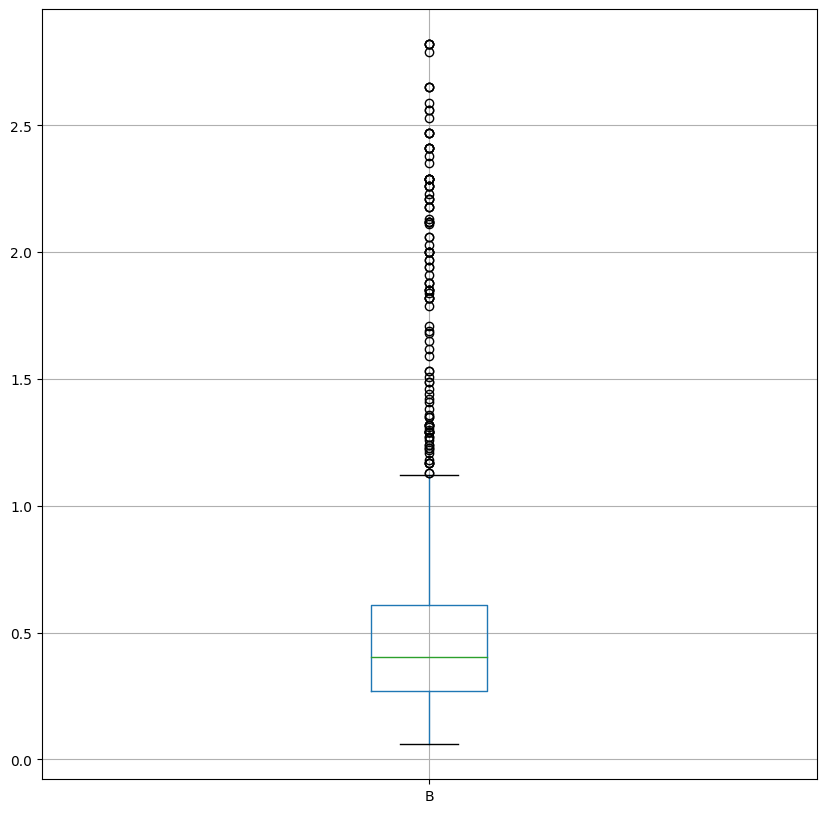

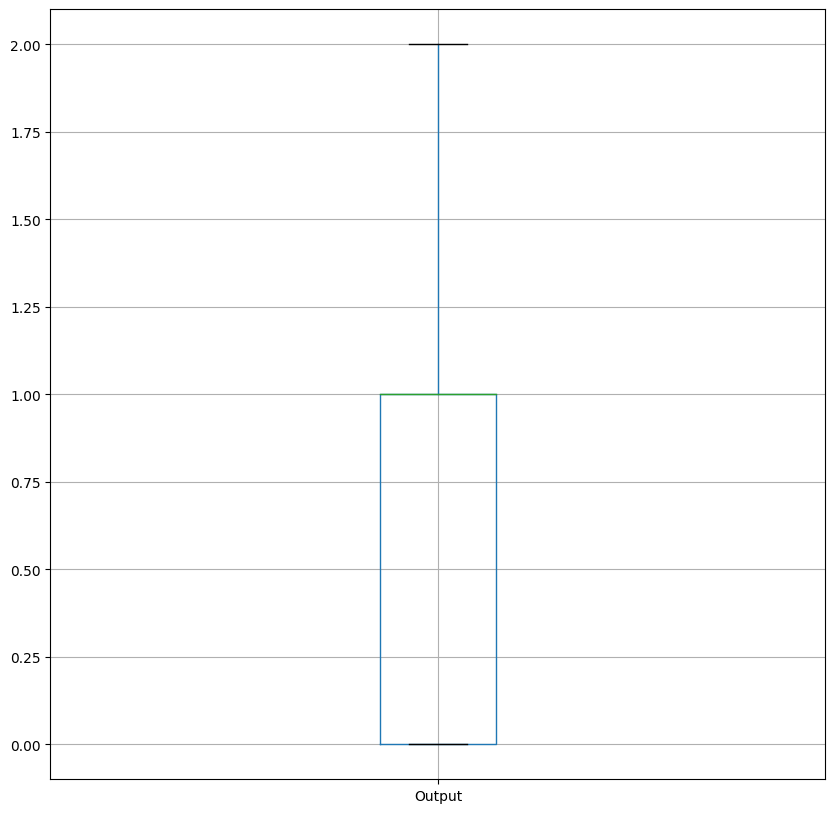

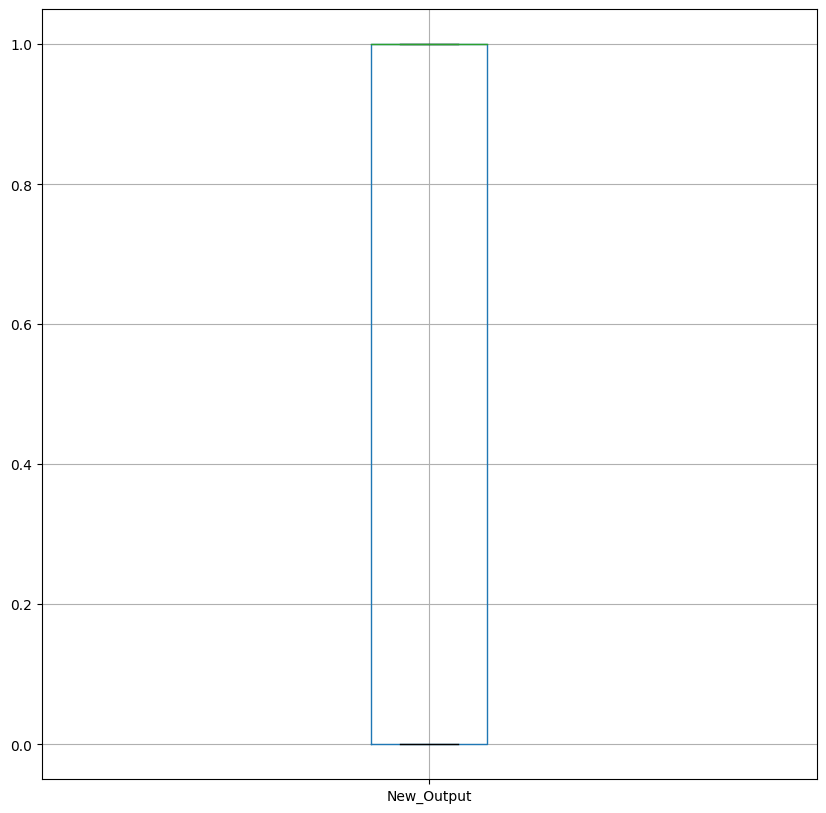

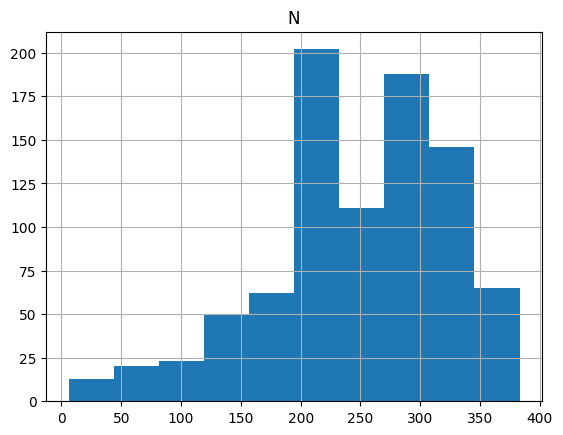

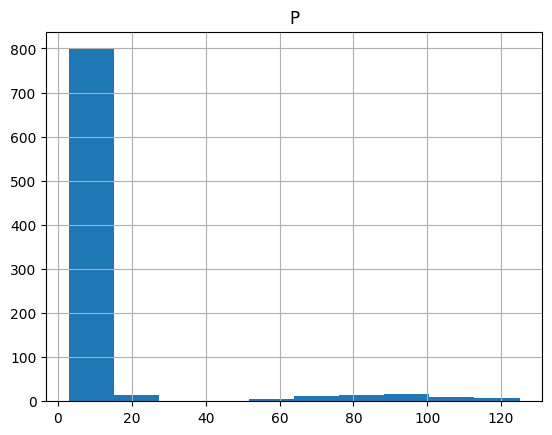

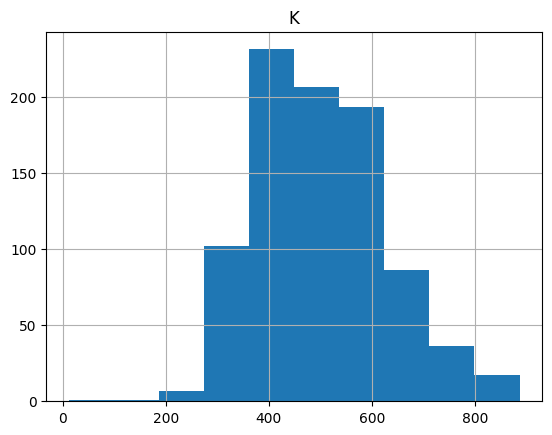

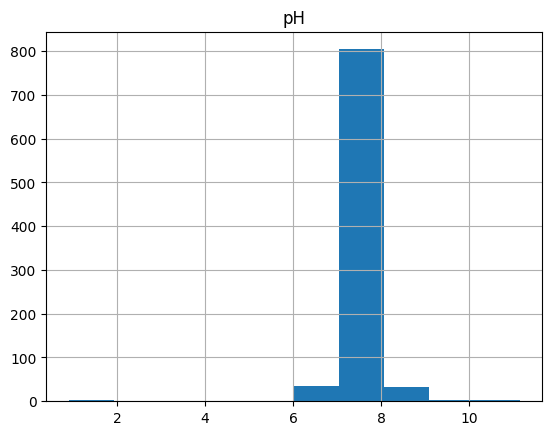

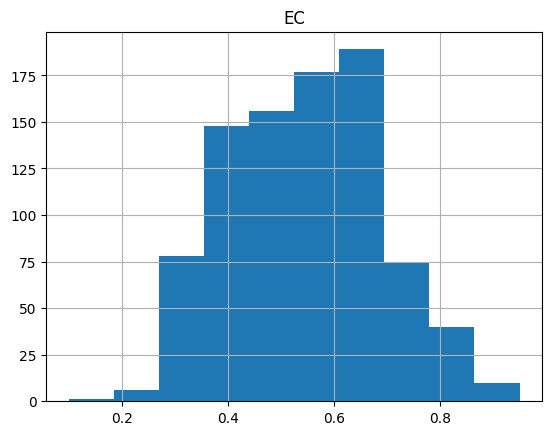

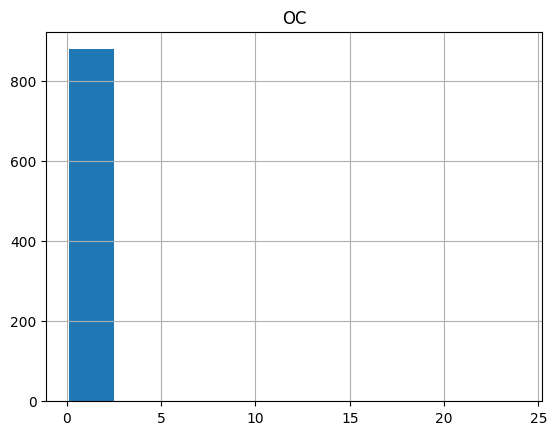

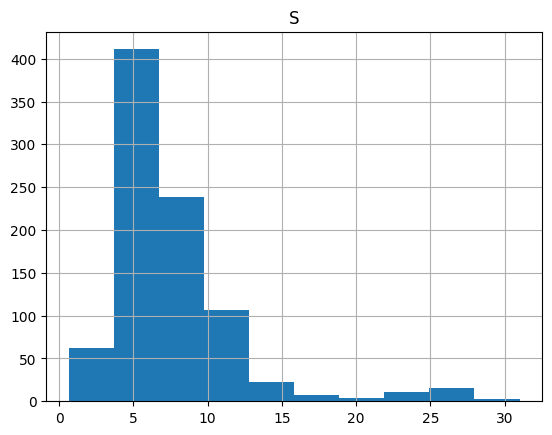

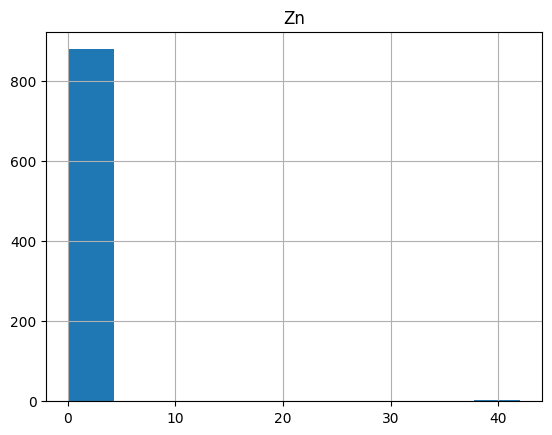

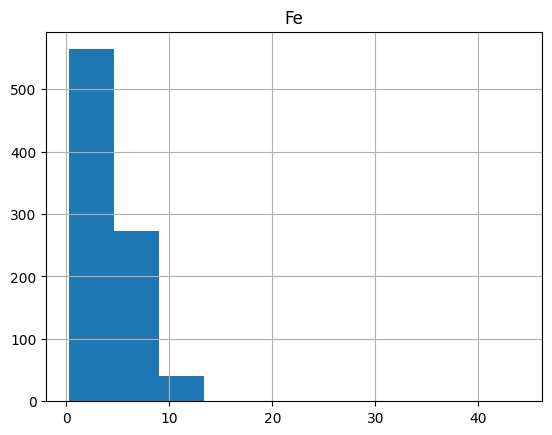

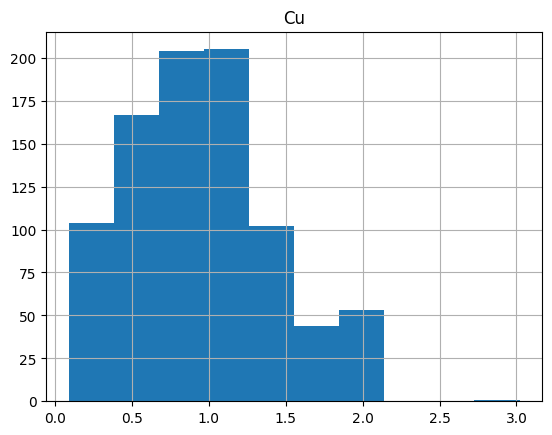

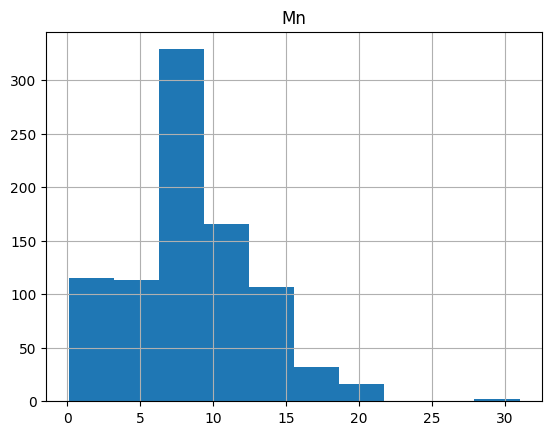

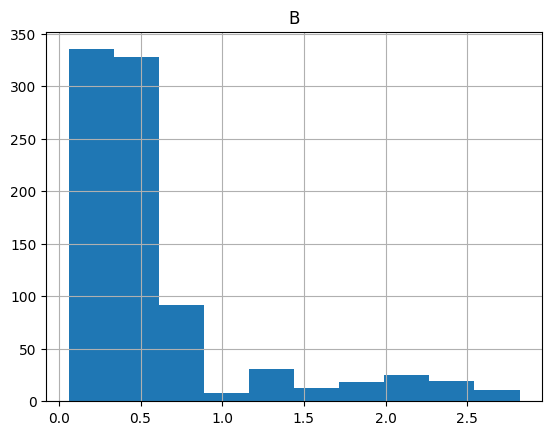

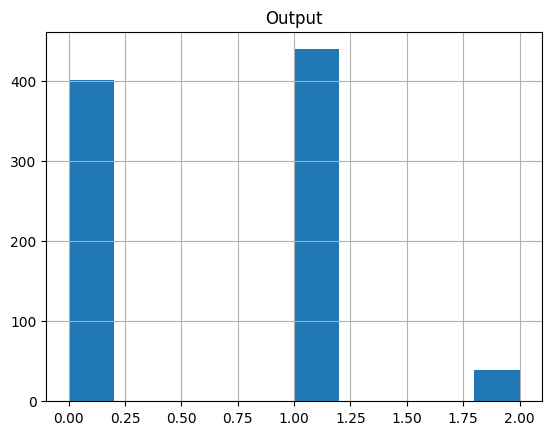

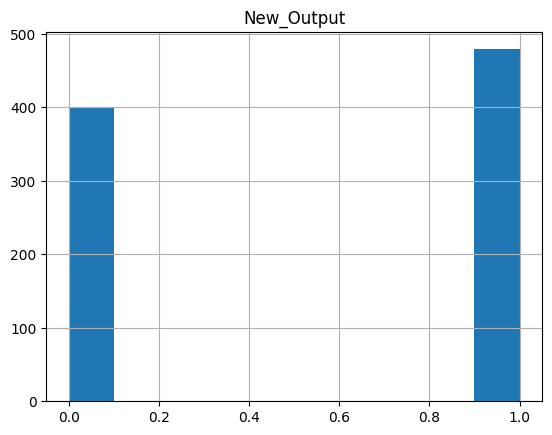

In [9]:
for col in data.columns:
    boxplot = data.boxplot(column=col, figsize=(10,10))
    plt.show()

#plot histogram for each column
for col in data.columns:
    data[col].hist()
    plt.title(col)
    plt.show()

In [ ]:
#for col in data.columns:    
#    q1 = data[col].quantile(0.25)
#    q3 = data[col].quantile(0.75)
#    iqr = q3 - q1
#    lower_bound = q1 - 1.5 * iqr
#    upper_bound = q3 + 1.5 * iqr
#    print(col, data[(data[col] < lower_bound) | (data[col] > upper_bound)].shape[0])
#    print(data[(data[col] < lower_bound) | (data[col] > upper_bound)])
#    print()

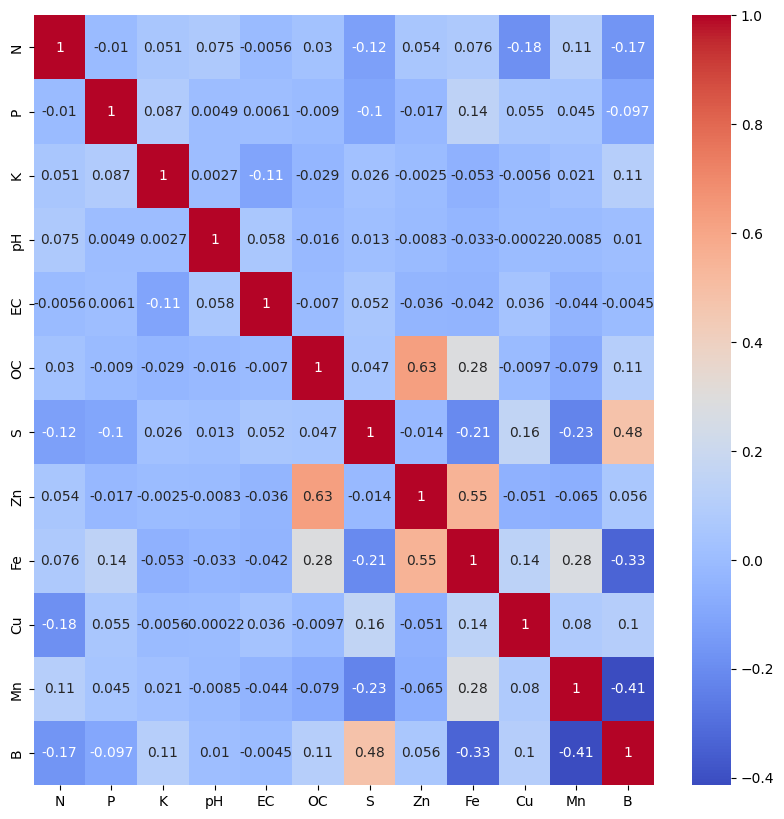

In [10]:
# Feature Selection
# Correlation
test = data.drop(['Output','New_Output'], axis=1)
correlation = test.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()
# Conclusion: No features are highly correlated

In [11]:
# train test split
X = data.drop(['Output','New_Output'], axis=1)
y = data['New_Output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
col = ['N','P','K']
sc = preprocessing.StandardScaler()
# fit the scaler to the training data
# transform the training data
X_train[col] = sc.fit_transform(X_train[col])
# transform the testing data
X_test[col] = sc.transform(X_test[col])

# Decision tree

In [13]:
# Decision Tree model

# Define the initial decision tree model
dt = tree.DecisionTreeClassifier(max_depth=5,random_state=1)

# Predict test set data
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Produce accuracy score
acc_dt = accuracy_score(y_test, y_pred)
print(acc_dt)

# Produce Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Calculate Precision, Recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

0.9204545454545454
[[76  2]
 [12 86]]
Precision: 0.9269111570247933
Recall: 0.9204545454545454
F1-score: 0.9207121742100366


In [14]:
# Create a dictionary for all values that we want to check
dt_cv = tree.DecisionTreeClassifier()

## Use gridsearch to test certain range of values for available parameters or arguments
param_grid = {'max_depth' : [5, 10, 15],
'max_features' : np.arange(2, 13),
'min_samples_leaf' : [3,4,5],
'min_samples_split' : [8, 10, 12]

}

# Fit grid search
dt_gscv = GridSearchCV(dt_cv, param_grid, cv = 5)
dt_gscv.fit(X_train, y_train)

# Best parameter and best accuracy scores from grid search
best_param = dt_gscv.best_params_
print(best_param)
print(dt_gscv.best_score_)

{'max_depth': 5, 'max_features': 7, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.9517223910840931


In [15]:
# Final chosen Decision Tree model

# Define the model
max_features = int(np.int64(9))

dt = tree.DecisionTreeClassifier(max_depth = 5,
                                    max_features = max_features,
                                    min_samples_leaf = 3,
                                    min_samples_split = 12, random_state=1)

# Fit the final model and make predictions on test set data
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Produce accuracy scores
acc_dt = accuracy_score(y_test, y_pred)
print(acc_dt)

# Produce Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Calculate Precision, Recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

0.9204545454545454
[[76  2]
 [12 86]]
Precision: 0.9269111570247933
Recall: 0.9204545454545454
F1-score: 0.9207121742100366


In [16]:
# Extract feature importance
feature_importance = dt.feature_importances_

# Create a DataFrame for better readability
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort features by importance (Descending)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display top features
print(feature_importance_df)

   Feature  Importance
0        N    0.854323
1        P    0.112505
11       B    0.009886
4       EC    0.009816
10      Mn    0.006871
6        S    0.005788
3       pH    0.000577
7       Zn    0.000234
2        K    0.000000
5       OC    0.000000
8       Fe    0.000000
9       Cu    0.000000


In [17]:
selected_features = ['N', 'P', 'EC', 'B', 'Mn', 'Cu', 'K', 'S']  # Removed Fe, pH, OC, Zn
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [18]:
dt = tree.DecisionTreeClassifier(
    max_depth=7,
    max_features=8,  # Adjusted to match new feature count
    min_samples_leaf=5,
    min_samples_split=10,
    random_state=1
)
dt.fit(X_train_selected, y_train)
y_pred = dt.predict(X_test_selected)

# Produce accuracy scores
acc_dt = accuracy_score(y_test, y_pred)
print(acc_dt)

# Produce Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Calculate Precision, Recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

0.9034090909090909
[[73  5]
 [12 86]]
Precision: 0.9068387494858082
Recall: 0.9034090909090909
F1-score: 0.9036944082956353


# Random forest

In [19]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Produce accuracy scores
acc_rf = accuracy_score(y_test, y_pred)
print(acc_rf)

# Calculate Precision, Recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(precision)
print(recall)
print(f1)

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

0.9147727272727273
0.9166681388309837
0.9147727272727273
0.9149805919097974
[[73  5]
 [10 88]]


In [20]:
# Extract feature importance
feature_importance = rf_model.feature_importances_

# Create a DataFrame for better readability
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort features by importance (Descending)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display top features
print(feature_importance_df)

   Feature  Importance
0        N    0.635956
1        P    0.155776
3       pH    0.051384
9       Cu    0.034931
8       Fe    0.019762
2        K    0.019205
11       B    0.018566
10      Mn    0.018114
6        S    0.014484
7       Zn    0.013498
4       EC    0.009213
5       OC    0.009111


# XG Boost

In [21]:
xgb_model = XGBClassifier(n_estimators=150, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Produce accuracy scores
acc_xgb = accuracy_score(y_test, y_pred)
print(acc_xgb)

# Calculate Precision, Recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

0.9261363636363636
Precision: 0.9314527491106336
Recall: 0.9261363636363636
F1-score: 0.9263733592610599
[[76  2]
 [11 87]]


In [22]:
# Extract feature importance
feature_importance = xgb_model.feature_importances_

# Create a DataFrame for better readability
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort features by importance (Descending)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display top features
print(feature_importance_df)

   Feature  Importance
0        N    0.613308
1        P    0.124069
6        S    0.038451
11       B    0.033618
7       Zn    0.030361
2        K    0.027582
8       Fe    0.026075
10      Mn    0.024074
4       EC    0.023794
5       OC    0.022511
9       Cu    0.018606
3       pH    0.017552


# KNN Poorly Generalized Models (Dun Use)

In [23]:
# Define initial kNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Produce accuracy score after predictions
acc_knn = accuracy_score(y_test, y_pred)
print(acc_knn)

# Produce confusion matrix 
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel() # tn and fp at first row of matrix
print(confusion_matrix(y_test,y_pred))

0.7329545454545454
[[54 24]
 [23 75]]


In [24]:
## Create a dictionary of all values we want to test for n_neighbors
knn_cv = KNeighborsClassifier()

## Use gridsearch to test all values for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 40)}

## Fit model
## cv --> 5-fold, Cross Validation
knn_gscv = GridSearchCV(knn_cv, param_grid, cv=5)
knn_gscv.fit(X_train,y_train)

# Best parameter and best accuracy scores from grid search
best_param = knn_gscv.best_params_
print(knn_gscv.best_score_)
print(best_param)

0.7968895643363728
{'n_neighbors': 15}


In [25]:
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# Produce accuracy scores
acc_lr = accuracy_score(y_test, y_pred)
print(acc_lr)

# Calculate Precision, Recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

0.8977272727272727
Precision: 0.8982007575757575
Recall: 0.8977272727272727
F1-score: 0.8978473894629446


c:\Users\YHLEE Smart Enterpri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
